In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 

In [5]:
df = pd.read_csv("Heart.csv")

In [7]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [8]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [11]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [12]:
data=df.drop(['RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],axis=1,inplace=True)

In [13]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,HeartDisease
0,40,M,ATA,140,289,0,0
1,49,F,NAP,160,180,0,1
2,37,M,ATA,130,283,0,0
3,48,F,ASY,138,214,0,1
4,54,M,NAP,150,195,0,0


In [14]:
from sklearn.preprocessing import LabelEncoder 
Sex=LabelEncoder()
ChestPainType=LabelEncoder()

In [15]:
df['Sex']=Sex.fit_transform(df['Sex'])
df['ChestPainType']=ChestPainType.fit_transform(df['ChestPainType'])

In [16]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,HeartDisease
913,45,1,3,110,264,0,1
914,68,1,0,144,193,1,1
915,57,1,0,130,131,0,1
916,57,0,1,130,236,0,1
917,38,1,2,138,175,0,0


<Axes: xlabel='Age', ylabel='HeartDisease'>

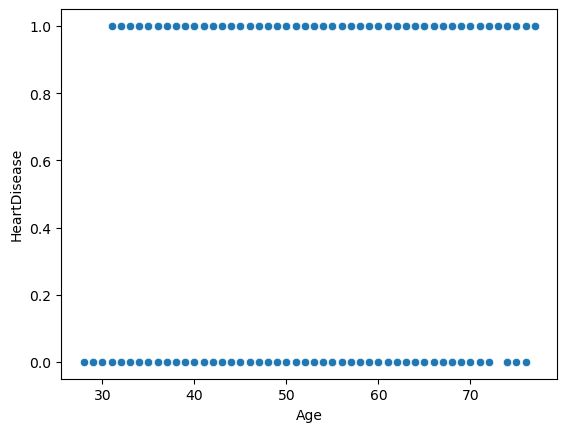

In [17]:
sns.scatterplot(x="Age",y="HeartDisease",data=df)

In [18]:
inputs=['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS']
x=df[inputs]
y=df.HeartDisease

In [19]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3)

In [20]:
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((642, 6), (642,), (276, 6), (276,))

In [21]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_x, train_y)

In [22]:
reg.score(test_x, test_y)

0.3692919432145261

In [23]:
reg.score(train_x, train_y)

0.2909449075261141

In [24]:
# meausre the metics 

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
x_train_prediction = reg.predict(train_x)
mae = mean_absolute_error(x_train_prediction , train_y)
mse = mean_squared_error(x_train_prediction , train_y)
rmse = mean_squared_error(x_train_prediction , train_y, squared=False)  # Or np.sqrt(mse)
r2 = r2_score(x_train_prediction , train_y)

In [28]:
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

MAE: 0.355716089167622
MSE: 0.17437191063060598
RMSE: 0.4175786280817135
R^2: -1.4370768284035034
